In [10]:
#데이터불러오기
election <- read.csv("Rdata/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [11]:
colnames(election)

[1] "광역시도" "시군구"   "선거인수" "투표수"   "이재명"   "윤석열"   "심상정"

In [260]:
table(election$광역시도)
voter_sum <- aggregate(투표수 ~ 광역시도, election, sum) #투표인
voter_sum



        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


In [13]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [14]:
str(election)
# 시군구는 248개인데 factor은 226이네! 

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [15]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

---
## 광역시도 투표율 구하기

In [286]:
# 라이브러리 불러오기
library(plotrix)
library(dplyr)

In [287]:
turnout <- round(voter_sum$투표수 / sum(voter_sum$투표수) * 100,2)
turnout

[1] 25.23 19.26  6.52  6.36  5.58  5.25  4.77  3.92  3.80  3.66  3.01  2.92
[13]  2.85  2.80  2.18  1.21  0.69

In [288]:
voter_sum$투표율 <- turnout
voter_sum<- arrange(voter_sum,desc(투표율))
voter_sum

광역시도,투표수,투표율
경기도,8518854,25.23
서울특별시,6501831,19.26
부산광역시,2200224,6.52
경상남도,2146882,6.36
인천광역시,1883504,5.58
경상북도,1774284,5.25
대구광역시,1611512,4.77
충청남도,1324660,3.92
전라남도,1282168,3.80
전라북도,1235212,3.66


In [289]:
turnout_ratio <- voter_sum[,c(1,3)]
turnout_ratio 

광역시도,투표율
경기도,25.23
서울특별시,19.26
부산광역시,6.52
경상남도,6.36
인천광역시,5.58
경상북도,5.25
대구광역시,4.77
충청남도,3.92
전라남도,3.80
전라북도,3.66


In [290]:
#label 만들기
투표율 <- paste(turnout_ratio$광역시도,"\n",turnout_ratio$투표율,"%")
투표율

[1] "경기도 \n 25.23 %"        "서울특별시 \n 19.26 %"   
 [3] "부산광역시 \n 6.52 %"     "경상남도 \n 6.36 %"      
 [5] "인천광역시 \n 5.58 %"     "경상북도 \n 5.25 %"      
 [7] "대구광역시 \n 4.77 %"     "충청남도 \n 3.92 %"      
 [9] "전라남도 \n 3.8 %"        "전라북도 \n 3.66 %"      
[11] "강원도 \n 3.01 %"         "광주광역시 \n 2.92 %"    
[13] "충청북도 \n 2.85 %"       "대전광역시 \n 2.8 %"     
[15] "울산광역시 \n 2.18 %"     "제주특별자치도 \n 1.21 %"
[17] "세종특별자치시 \n 0.69 %"

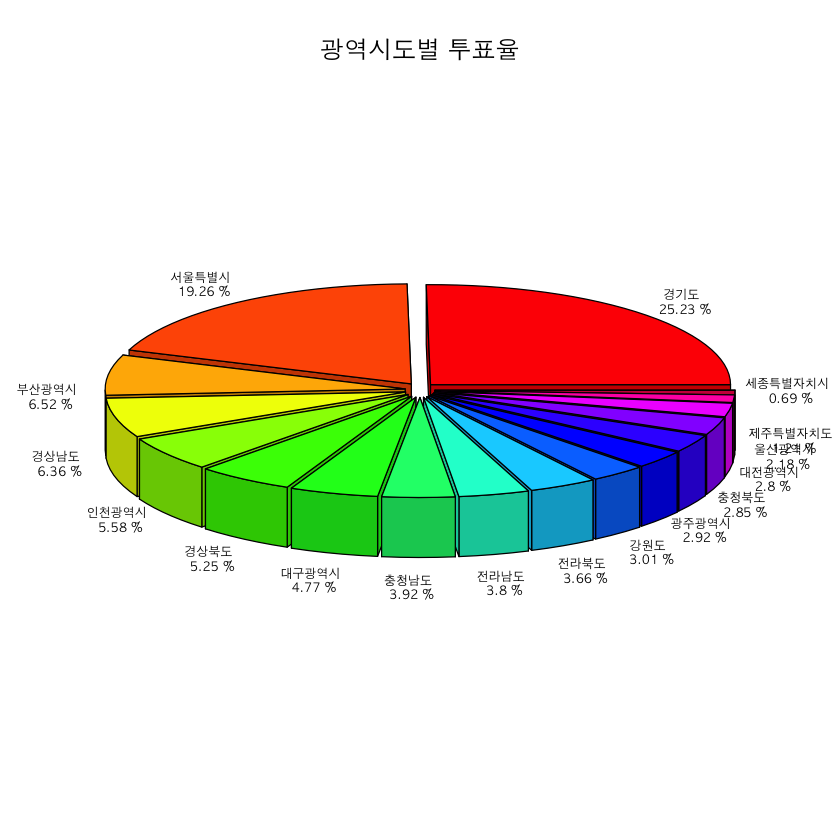

In [291]:
par(family = "AppleGothic")
options(warn = -1)
pie3D( turnout_ratio$투표율,
        main = "광역시도별 투표율",
        labels = 투표율,
        explode = 0.05,
        labelcex = 0.6,
        #radius = 0.8
     )

In [28]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- apply(election[, 5:7], 1,sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [293]:
# electionRation <- 투표수대비 electionSum의 퍼센트 구해서 넣기
election$electionRatio <- election$electionSum / election$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565,98.00565


In [30]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
# 1) 정렬
library(dplyr)

In [294]:
arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334,96.02334


In [295]:
#2) subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334,96.02334


In [33]:
# election_2022_job1.csv로 저장하기
write.csv(election,"Rdata/election_2022_job1.csv", row.names = F)

## 각 후보(윤,이,심)의 광역시도별 득표율을 3D Pie Chart로 표현하기
## (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다./퍼센트 단위는 소수 한자리)

In [229]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [308]:
electionSim <-
aggregate(심상정 ~ 광역시도, election, sum)
electionSim

광역시도,심상정
강원도,25031
경기도,201113
경상남도,52591
경상북도,33123
광주광역시,14865
대구광역시,31131
대전광역시,25445
부산광역시,47541
서울특별시,180324
세종특별자치시,6780


In [325]:
#Ratio 값 구하기
electionSim$득표율 <-
round(electionSim$심상정 / sum(electionSim$심상정) *100,2)     
electionSim

광역시도,심상정,득표율
경기도,201113,25.22
서울특별시,180324,22.61
경상남도,52591,6.59
인천광역시,51852,6.50
부산광역시,47541,5.96
경상북도,33123,4.15
충청남도,31789,3.99
대구광역시,31131,3.90
대전광역시,25445,3.19
충청북도,25247,3.17


In [327]:
electionSim_ratio <-
electionSim[,c(1,3)]
electionSim_ratio

광역시도,득표율
경기도,25.22
서울특별시,22.61
경상남도,6.59
인천광역시,6.50
부산광역시,5.96
경상북도,4.15
충청남도,3.99
대구광역시,3.90
대전광역시,3.19
충청북도,3.17


In [336]:
# label 구하기
#electionSim_ratio$광역시도 Index 값이 나온건 Fector이기 떄문에 그래서 형변환을 해줘야함.
Sim투표율 <-
ifelse(electionSim_ratio$득표율>3,
        paste(electionSim_ratio$광역시도,"\n",electionSim_ratio$득표율,"%"),
        as.character(electionSim_ratio$광역시도))
Sim투표율 

[1] "경기도 \n 25.22 %"     "서울특별시 \n 22.61 %" "경상남도 \n 6.59 %"   
 [4] "인천광역시 \n 6.5 %"   "부산광역시 \n 5.96 %"  "경상북도 \n 4.15 %"   
 [7] "충청남도 \n 3.99 %"    "대구광역시 \n 3.9 %"   "대전광역시 \n 3.19 %" 
[10] "충청북도 \n 3.17 %"    "강원도 \n 3.14 %"      "울산광역시"           
[13] "전라북도"              "전라남도"              "광주광역시"           
[16] "제주특별자치도"        "세종특별자치시"

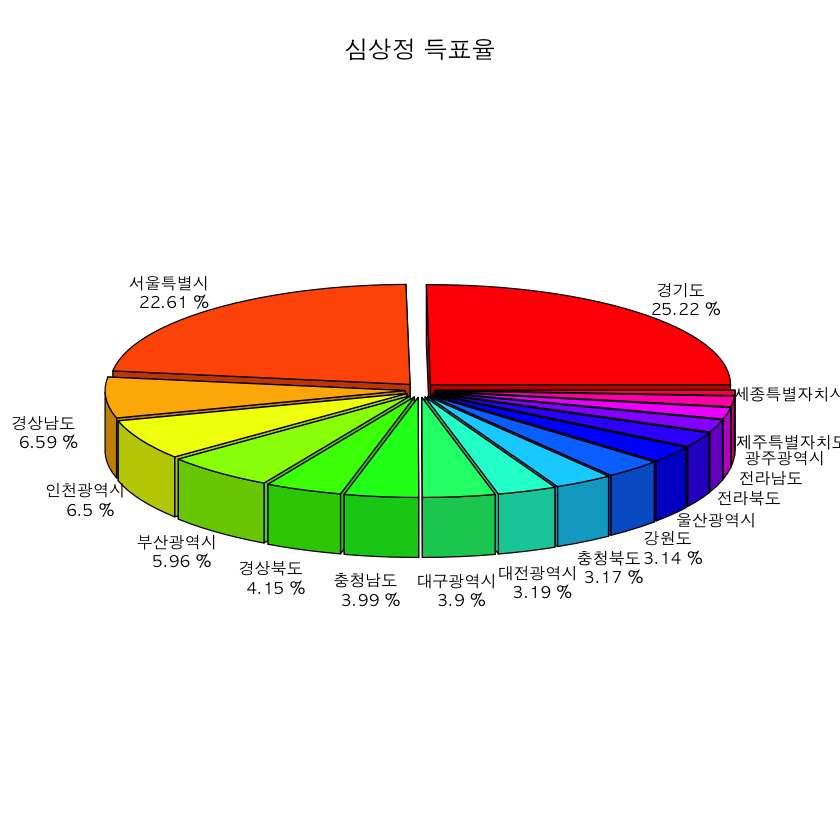

In [338]:
par(family = "AppleGothic")
options(warn = -1)
pie3D( electionSim_ratio$득표율,
        main = "심상정 득표율",
        labels = Sim투표율,
        explode = 0.05,
        labelcex = 0.8,
        #radius = 0.8
     )

In [99]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
sum(voter_sum$투표수[c(2,9,12),])/sum(voter_sum$투표수)

ERROR: Error in voter_sum$투표수[c(2, 9, 12), ]: incorrect number of dimensions


In [163]:
# 윤석열 후보의 서울득표 top5를 구하고 나머지 지역은 기타로 합치기
head(election)
election_seoul <- arrange(subset(election, 광역시도 == '서울특별시'),desc(윤석열))
#election_seoul
election_seoul$윤석열득표 <-round(election_seoul$윤석열 / sum(election_seoul$윤석열) * 100, 2)
head(election_seoul)
#election_seoul[1:5,]


#election_seoul[6:nrow(election_seoul),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,윤석열득표
서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630,7.84
서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59180,7.25
서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303,5.58
서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61234,5.51
서울특별시,노원구,441879,349297,169275,163340,10021,342636,98.09303,5.02
서울특별시,강동구,397634,313203,139172,160593,8029,307794,98.27301,4.93


In [143]:
par(family = "AppleGothic")
pie3D(election_seoul$윤석열득표,
      main = "윤석열 후보 서울 득표 Top5",
      
     )

ERROR: Error in election_seoul$윤석열득표[1:5, ]: incorrect number of dimensions


### 윤석렬 후보의 서울 특표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기


In [158]:
#서울특별시 Data만 발췌하기
#subset(election, 광역시도 == "서울특별시")

election_seoul2 <- election[election$광역시도 == "서울특별시",] # 파이썬에선 이걸 많이씀.
election_seoul2_윤석열 <- arrange(election_seoul2, desc(윤석열))[, c(2,6)]
head(election_seoul2_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [340]:
#Ratio 구하기
election_seoul2_윤석열_ratio <- 
    round(c(election_seoul2_윤석열[1:5, 2], sum(election_seoul2_윤석열[-c(1:5), 2])) /
    sum(election_seoul2_윤석열$윤석열) * 100, 2)
election_seoul2_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [346]:
#Label만들기
election_seoul2_윤석열_label <- c(as.character(election_seoul2_윤석열$시군구[1:5]),"기타")
election_seoul2_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

In [348]:
election_seoul2_윤석열_label<- 
paste(election_seoul2_윤석열_label,"\n",election_seoul2_윤석열_ratio,"%")

#election_seoul2_윤석열_label

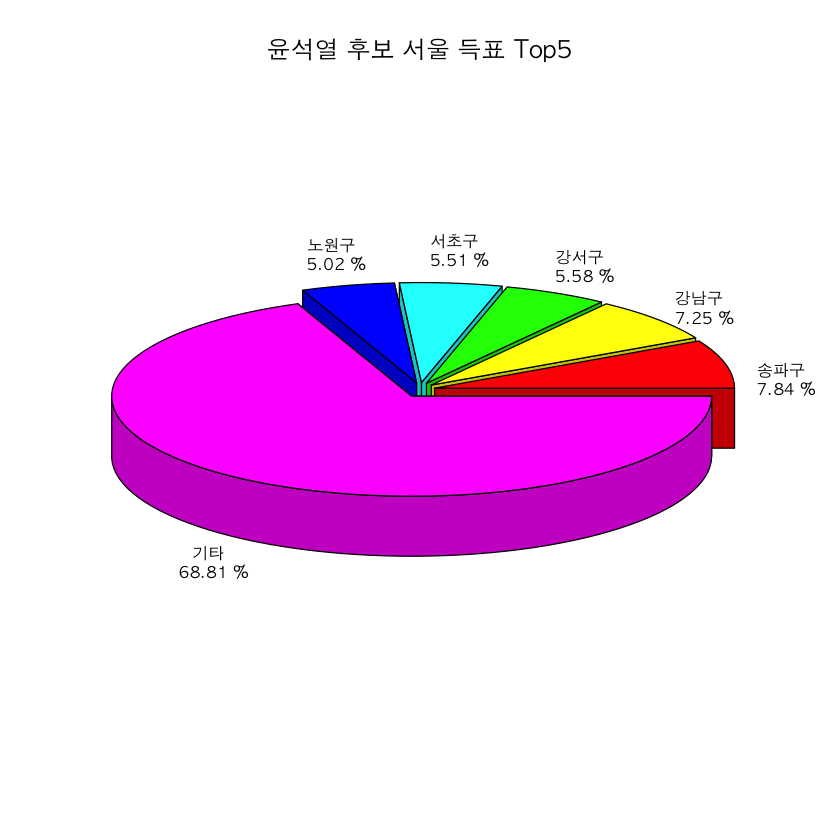

In [352]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(election_seoul2_윤석열_ratio,
      labels = election_seoul2_윤석열_label,
      explode = 0.05,
      labelcex = 0.8,
      main = "윤석열 후보 서울 득표 Top5"
     )

In [185]:
#대선주자 출생자별 득표율 분석
#서울시 성북구의 후보별 득표율
election_seoul3 <- election[c(election$광역시도 == "서울특별시" & election$시군구=="성북구"),]
election_seoul3

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [202]:
# ratio 구하기
election_seoul3_ratio <- round(election_seoul3[5:7] / election_seoul3$투표수 * 100,2)
election_seoul3_ratio

,이재명,윤석열,심상정
8,48.84,46.22,3.06


In [192]:
#label 만들기
election_seoul3_ratio

'data.frame':	1 obs. of  3 variables:
 $ 이재명: num 48.8
 $ 윤석열: num 46.2
 $ 심상정: num 3.06


In [199]:
par(family = "AppleGothic")
pie3Delection_seoul3_ratio)

ERROR: Error in pie3D(election_seoul3_ratio): pie3D: x values must be positive numbers


In [203]:
pob_윤석열 <- subset(election, 시군구 == "성북구")
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [212]:
#백터로 합쳐보자
pob_윤석열_num <-
as.numeric(c(pob_윤석열[, 5:7], pob_윤석열[,4] - sum(pob_윤석열[, 5:7])))
pob_윤석열_num

[1] 142702 135044   8952   5489

In [231]:
colnames(pob_윤석열)[5:7]

[1] "이재명" "윤석열" "심상정"

In [232]:
#label
pob_윤석열_label <-
paste(c(colnames(pob_윤석열)[5:7],"기타"),round(pob_윤석열_num/pob_윤석열$투표수*100,2))

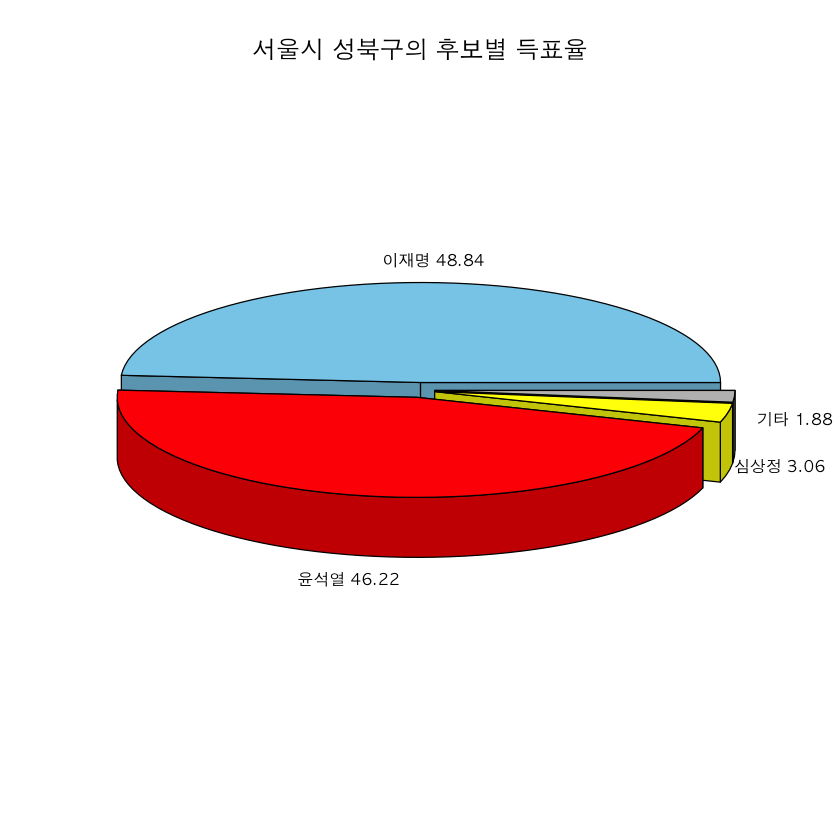

In [353]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(pob_윤석열_num,
     labels = pob_윤석열_label,
      explode = 0.05,
      labelcex = 0.8,
      col = c("skyblue","red","yellow","grey"),
      main = "서울시 성북구의 후보별 득표율"
     )